In [1]:
import sys
import os
from ml4cvd.arguments import parse_args
from ml4cvd.recipes import run
import h5py
import numpy as np
import matplotlib
# font = {'family' : 'Arial',
#         'size'   : 30}
# matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
from typing import List, Dict, Callable
from collections import defaultdict
import pandas as pd

from ml4cvd.arguments import _get_tmap
from ml4cvd.tensor_generators import test_train_valid_tensor_generators
from ml4cvd.TensorMap import TensorMap
from ml4cvd.tensor_from_file import TMAPS

import numpy as np
USER = 'pdiachil'
HOME_PATH = '/home/' + USER

/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '
Using TensorFlow backend.


In [2]:
sys.argv = [
    'train',
    '--mode', 'train',
    '--inspect_model',
    '--tensors', '/mnt/disks/ecg-rest-37k-tensors/2019-11-04',
    '--input_tensors', 'ecg_rest_masked',
    '--output_tensors', 'ecg_rest',
    '--training_steps', '150',
    '--validation_steps', '30',
    '--epochs', '200',
    '--batch_size', '32',
    '--u_connect',
    '--output_folder', '/home/pdiachil/ukbb-output/',
    '--id', 'uconnect_masked_pretraining',
]
args = parse_args()
generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(**args.__dict__)

2020-01-31 18:39:06,789 - logger:25 - INFO - Logging configuration was loaded. Log messages can be found at /home/pdiachil/ukbb-output/uconnect_masked_pretraining/log_2020-01-31_18-39_0.log.
2020-01-31 18:39:06,790 - arguments:211 - INFO - Command Line was:

./scripts/tf.sh train --mode train --inspect_model --tensors /mnt/disks/ecg-rest-37k-tensors/2019-11-04 --input_tensors ecg_rest_masked --output_tensors ecg_rest --training_steps 150 --validation_steps 30 --epochs 200 --batch_size 32 --u_connect --output_folder /home/pdiachil/ukbb-output/ --id uconnect_masked_pretraining



2020-01-31 18:39:06,791 - arguments:212 - INFO - Total TensorMaps:397 Arguments are Namespace(activation='relu', aligned_dimension=16, alpha=0.5, anneal_max=1.0, anneal_rate=1.0, anneal_shift=10, app_csv=None, b_slice_force=None, balance_csvs=[], batch_size=32, bigquery_credentials_file='/mnt/ml4cvd/projects/jamesp/bigquery/bigquery-viewer-credentials.json', bigquery_dataset='broad-ml4cvd.ukbb7089_r10data', bloc

2020-01-31 18:39:07,338 - tensor_generators:110 - INFO - Starting train_worker_0.
2020-01-31 18:39:07,339 - tensor_generators:234 - INFO - train_worker_0 initialized cache of size 0.875 GB.
2020-01-31 18:39:07,353 - tensor_generators:110 - INFO - Starting train_worker_1.
2020-01-31 18:39:07,357 - tensor_generators:234 - INFO - train_worker_1 initialized cache of size 0.875 GB.
2020-01-31 18:39:07,366 - tensor_generators:110 - INFO - Starting train_worker_2.
2020-01-31 18:39:07,372 - tensor_generators:234 - INFO - train_worker_2 initialized cache of size 0.875 GB.
2020-01-31 18:39:07,387 - tensor_generators:110 - INFO - Starting train_worker_3.
2020-01-31 18:39:07,392 - tensor_generators:234 - INFO - train_worker_3 initialized cache of size 0.875 GB.


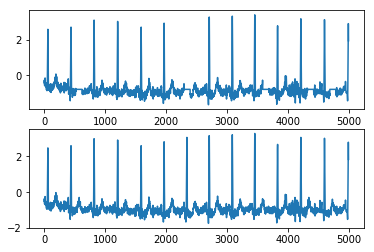

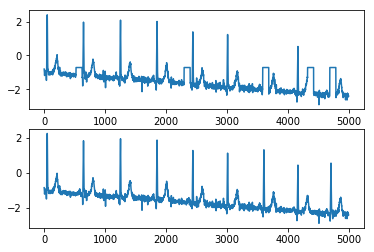

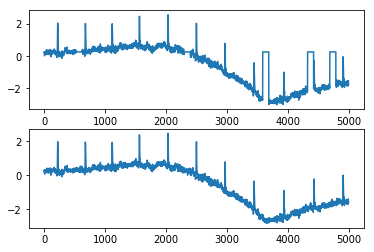

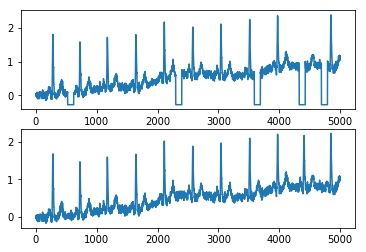

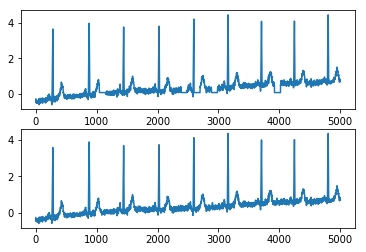

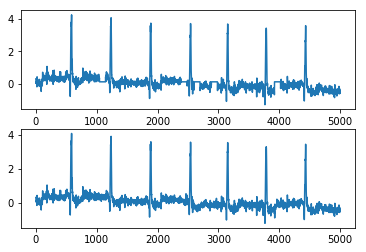

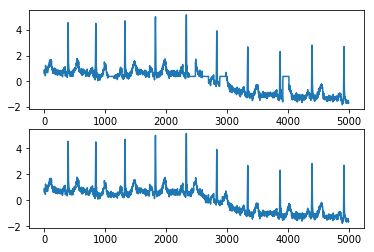

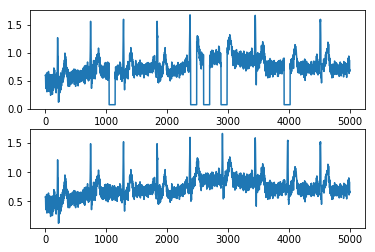

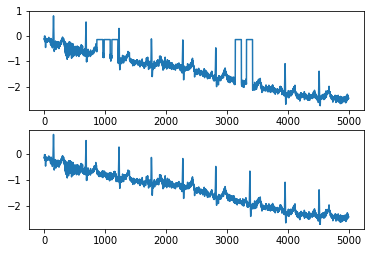

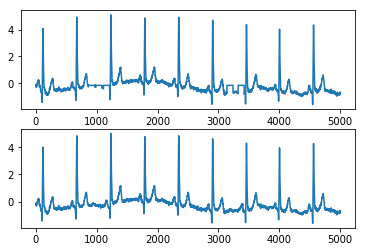

In [3]:
%matplotlib inline
for i in range(10):
    a, b = next(generate_train)
    input_tensor = a['input_masked_strip_ecg_rest']
    output_tensor = b['output_strip_ecg_rest']
    f, ax = plt.subplots(2, 1)
    ax[0].plot(input_tensor[0, :, 0])
    ax[1].plot(output_tensor[0, :, 0])

In [ ]:
run(args)

2020-01-31 18:39:18,790 - tensor_generators:426 - INFO - Found 23511 train, 6816 validation, and 7296 testing tensors at: /mnt/disks/ecg-rest-37k-tensors/2019-11-04
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_masked_strip_ecg_rest (In (None, 5000, 8)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 5000, 32)     18208       input_masked_strip_ecg_rest[0][0]
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 5000, 32)     0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)         

2020-01-31 18:39:20,168 - models:1100 - INFO - Saving architecture diagram to:/home/pdiachil/ukbb-output/uconnect_masked_pretraining/architecture_graph_uconnect_masked_pretraining.png
Epoch 1/1
2020-01-31 18:39:32,802 - tensor_generators:110 - INFO - Starting validation_worker_0.
2020-01-31 18:39:32,804 - tensor_generators:110 - INFO - Starting train_worker_0.
2020-01-31 18:39:32,806 - tensor_generators:234 - INFO - validation_worker_0 initialized cache of size 0.875 GB.
2020-01-31 18:39:32,808 - tensor_generators:234 - INFO - train_worker_0 initialized cache of size 0.875 GB.
2020-01-31 18:39:32,830 - tensor_generators:110 - INFO - Starting validation_worker_1.
2020-01-31 18:39:32,853 - tensor_generators:110 - INFO - Starting train_worker_1.
2020-01-31 18:39:32,858 - tensor_generators:234 - INFO - validation_worker_1 initialized cache of size 0.875 GB.
2020-01-31 18:39:32,858 - tensor_generators:234 - INFO - train_worker_1 initialized cache of size 0.875 GB.
2020-01-31 18:39:32,901 - 

	347.57 seconds elapsed.
150/150 [==============================] - 48s 320ms/step - loss: 0.0161 - val_loss: 0.0163

Epoch 00009: val_loss did not improve from 0.01553
Epoch 10/200
150/150 [==============================] - 48s 321ms/step - loss: 0.0153 - val_loss: 0.0148

Epoch 00010: val_loss improved from 0.01553 to 0.01476, saving model to /home/pdiachil/ukbb-output/uconnect_masked_pretraining/uconnect_masked_pretraining.hd5
Epoch 11/200
123/150 [=======================>......] - ETA: 8s - loss: 0.01502020-01-31 18:50:28,617 - tensor_generators:301 - INFO - Worker train_worker_2 - In true epoch 3:
	The following errors occurred:
		
	Generator looped & shuffled over 5878 paths.
	5878 tensors were presented.
	The cache holds 2734 out of a possible 11756 tensors and is 100% full.
	So far there have been 5468 cache hits.
	0 paths were skipped because they previously failed.
	175.16 seconds elapsed.
133/150 [=========================>....] - ETA: 5s - loss: 0.01492020-01-31 18:50:31,67